<a id="section_CART"></a> 
## Workshop Final DS Digital House

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# importando bases de treino e teste
df_test = pd.read_csv(r'https://raw.githubusercontent.com/faustinothiagos/Workshop_Final_DS_Digital_House_2022/main/DataSet/test.csv')
df_train = pd.read_csv(r'https://raw.githubusercontent.com/faustinothiagos/Workshop_Final_DS_Digital_House_2022/main/DataSet/train.csv')

c:\Users\Luquinhas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# incluindo colunas para sperar os dados da mesma maneira que estavam originalmente
df_train['test'] = 0
df_test['test'] = 1

# incluindo coluna de score com nan nos dados de teste
df_test['Credit_Score'] = np.nan

In [5]:
# concatenando os datasets ja que eles tem as mesmas colunas

df_total = pd.concat([df_train, df_test], ignore_index = True)

In [47]:
df_total.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,test
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good,0


In [ ]:
# checar distribuicao de cada dataset

In [6]:
print('dados de treino: ', df_train.shape)
print('dados de teste: ', df_test.shape)
print('todos os dados agrupados: ', df_total.shape)

dados de treino:  (100000, 29)
dados de teste:  (50000, 29)
todos os dados agrupados:  (150000, 29)


Colunas dataset:

* ID - Identificador de entrada
* Customer_ID - ID cliente
* Month - Mês do ano
* Name - nome do cliente
* Age - Idade Cliente
* SSN - Social Security Number (CPF no Brasil)
* Occupation - Ocupação do cliente
* Annual_Income - renda anual
* Monthly_Inhand_Salary - Salario mensal do cliente
* Num_Bank_Accounts - quantidade de contas em bancos
* Num_Credit_Card - quantidade de cartões de crédito
* Interest_Rate - taxa de juros cartão de crédito
* Num_of_Loan - Quantidade de empréstimos feitos no banco
* Type_of_Loan - tipo de empréstimo feito pelo cliente
* Delay_from_due_date - qtd. de dias de atraso pagamento cartão
* Num_of_Delayed_Payment - Média de pagamentos atrasado pelo cliente
* Changed_Credit_Limit - Variação percentual de limite do cartão de crédito
* Num_Credit_Inquiries - Quantidade de "cobranças" no cartão
* Credit_Mix - mix de crédito do cliente
* Outstanding_Debt - restante à ser pago da dívida
* Credit_Utilization_Ratio - Taxa de utlização do cartão de crédito
* Credit_History_Age - Tempo de histórico de crédito do cliente
* Payment_of_Min_Amount - Pagamento minimo
* Total_EMI_per_month - Pagamento fixo em dolares por mes
* Amount_invested_monthly - Quantidade de dinheiro investido pelo cliente mensalmente
* Payment_Behaviour - Comportamento de pagamento cliente
* Monthly_Balance - Saldo Mensal Cliente
* Credit_Score - Target
* test - coluna utilizada para separar o dataset nos dados de treino e teste

In [7]:
# quantidade % de dados faltantes
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title("% de dados faltantes")
        plt.show()
    else:
        print('No NAs found')

In [10]:
# campos que fazem sentido permanecer

colunas_ul = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for row in colunas_ul:
    df_total[row] = df_total[row].str.replace(r'_+', '')

<ipython-input-10-cdf7e71b0c7d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_total[row] = df_total[row].str.replace(r'_+', '')


In [11]:
# removendo os underlines e colocando NaN
df_total['Occupation'] = df_total['Occupation'].replace('_______', np.nan)

In [52]:
df_total.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,test
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good,0


In [20]:
colunas = df_total.columns

for coluna in colunas:
    print('Variavel: ', coluna)
    print(df_total[coluna].value_counts(dropna=False))

Variavel:  ID
0x8f5f     1
0x18109    1
0x1280b    1
0x6cfa     1
0x9b0d     1
          ..
0x258cf    1
0x9c9f     1
0x137f1    1
0x21f2e    1
0x1c4fd    1
Name: ID, Length: 150000, dtype: int64
Variavel:  Customer_ID
CUS_0x1c79    12
CUS_0x7e8d    12
CUS_0x4a6a    12
CUS_0x444c    12
CUS_0x70d0    12
              ..
CUS_0x334d    12
CUS_0x6fb9    12
CUS_0x31ac    12
CUS_0x4b3c    12
CUS_0x5ae3    12
Name: Customer_ID, Length: 12500, dtype: int64
Variavel:  Month
October      12500
January      12500
August       12500
June         12500
November     12500
February     12500
April        12500
September    12500
March        12500
May          12500
December     12500
July         12500
Name: Month, dtype: int64
Variavel:  Name
NaN                   15000
Stevex                   66
Langep                   65
Jessicad                 59
Deepa Seetharamanm       58
                      ...  
Olesya Dmitracovaq        7
Debbie Hummeld            7
Deepae                    7
Giuseppe

In [22]:
# limpando dados

# apos avaliar as informacoes nota-se que existem alguns padroes como caracteres _ (underlines) nos campos de numero
# e em alguma variaveis de string contam com alguns erros como campos vazios, 'nan' escritos e informacoes que nao fazem sentido.

df_teste = df_total.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [39]:
df_total['Changed_Credit_Limit'] = df_total['Changed_Credit_Limit'].replace('', np.nan)

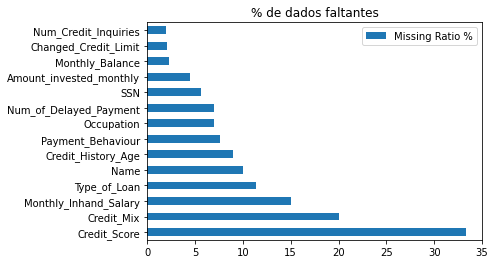

In [25]:
plot_nas(df_teste)

In [44]:
df_total.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int32
Num_Credit_Card               int32
Interest_Rate               float64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [43]:
# transformando as variaveis para o tipo que faz sentido

col_int = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment']
col_float = ['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date', 
             'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
             'Amount_invested_monthly', 'Total_EMI_per_month']
col_cat = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# aplicando as type para variaveis int

df_total['Age'] = df_total['Age'].astype('int')
df_total['Num_Bank_Accounts'] = df_total['Num_Bank_Accounts'].astype('int')
df_total['Num_Credit_Card'] = df_total['Num_Credit_Card'].astype('int')
df_total['Num_of_Loan'] = df_total['Num_of_Loan'].astype('int')
df_total['Num_of_Delayed_Payment'] = df_total['Num_of_Delayed_Payment'].astype('int', errors='ignore')

# float

df_total['Annual_Income'] = df_total['Annual_Income'].astype('float')
df_total['Monthly_Inhand_Salary'] = df_total['Monthly_Inhand_Salary'].astype('float')
df_total['Interest_Rate'] = df_total['Interest_Rate'].astype('float')
df_total['Delay_from_due_date'] = df_total['Delay_from_due_date'].astype('float')
df_total['Changed_Credit_Limit'] = df_total['Changed_Credit_Limit'].astype('float')
df_total['Num_Credit_Inquiries'] = df_total['Num_Credit_Inquiries'].astype('float')
df_total['Outstanding_Debt'] = df_total['Outstanding_Debt'].astype('float')
df_total['Credit_Utilization_Ratio'] = df_total['Credit_Utilization_Ratio'].astype('float')
df_total['Amount_invested_monthly'] = df_total['Amount_invested_monthly'].astype('float')
df_total['Total_EMI_per_month'] = df_total['Total_EMI_per_month'].astype('float')

# object

df_total['Occupation'] = df_total['Occupation'].astype('object')
df_total['Credit_Mix'] = df_total['Credit_Mix'].astype('object')
df_total['Payment_of_Min_Amount'] = df_total['Payment_of_Min_Amount'].astype('object')
df_total['Payment_Behaviour'] = df_total['Payment_Behaviour'].astype('object')

In [51]:
df_total[['Type_of_Loan']].head()

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


In [ ]:
# converter month para qtd meses e ver a media do cliente (?)

# agrupar informacoes por ID cliente

# converter campo Type_of_Loan em lista e indexar cada tipo de emprestimo